In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("supermarket_sales .csv")

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
df.groupby("Total")

In [10]:
branch_sales = df.groupby('Branch')['Total'].sum()

In [11]:
print(branch_sales)

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


In [12]:
most_profitable_branch = branch_sales.idxmax()

In [13]:
print(most_profitable_branch )

C


In [14]:
import matplotlib.pyplot as plt

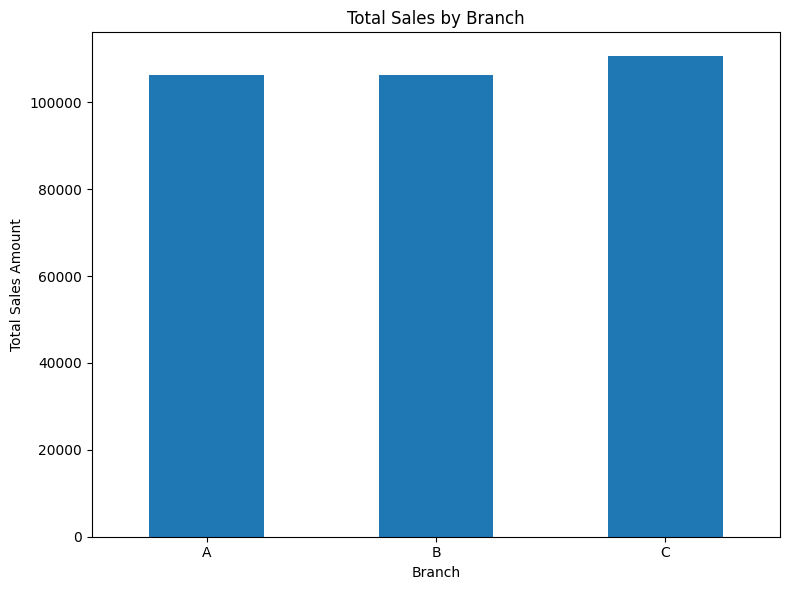

In [15]:
plt.figure(figsize=(8, 6))
branch_sales.plot(kind='bar')
plt.xlabel('Branch')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales by Branch')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

From the chart and the values, Branch C is performing the best in terms of revenue, with the highest total sales.

In [16]:
average_sales_by_customer_type = df.groupby('Customer type')['Total'].mean()
print(average_sales_by_customer_type)

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64


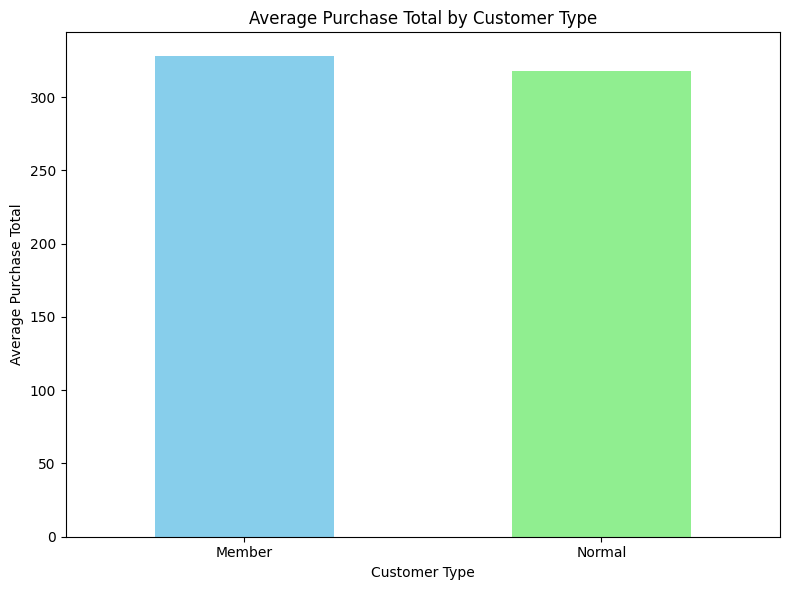

In [17]:
plt.figure(figsize=(8, 6))
average_sales_by_customer_type.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Customer Type')
plt.ylabel('Average Purchase Total')
plt.title('Average Purchase Total by Customer Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Observing the chart, it appears that Member customers tend to spend slightly more per transaction on average than Normal customers. The bar for "Member" is slightly higher than the bar for "Normal".

In [18]:
product_line_sales = df.groupby('Product line')['Total'].sum()
most_profitable_product_line = product_line_sales.idxmax()
highest_product_line_sales = product_line_sales.max()

print("Total sales by product line:")
print(product_line_sales)
print(f"\nThe product line with the greatest total sales is '{most_profitable_product_line}' with total sales of {highest_product_line_sales:.2f}.")

Total sales by product line:
Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

The product line with the greatest total sales is 'Food and beverages' with total sales of 56144.84.


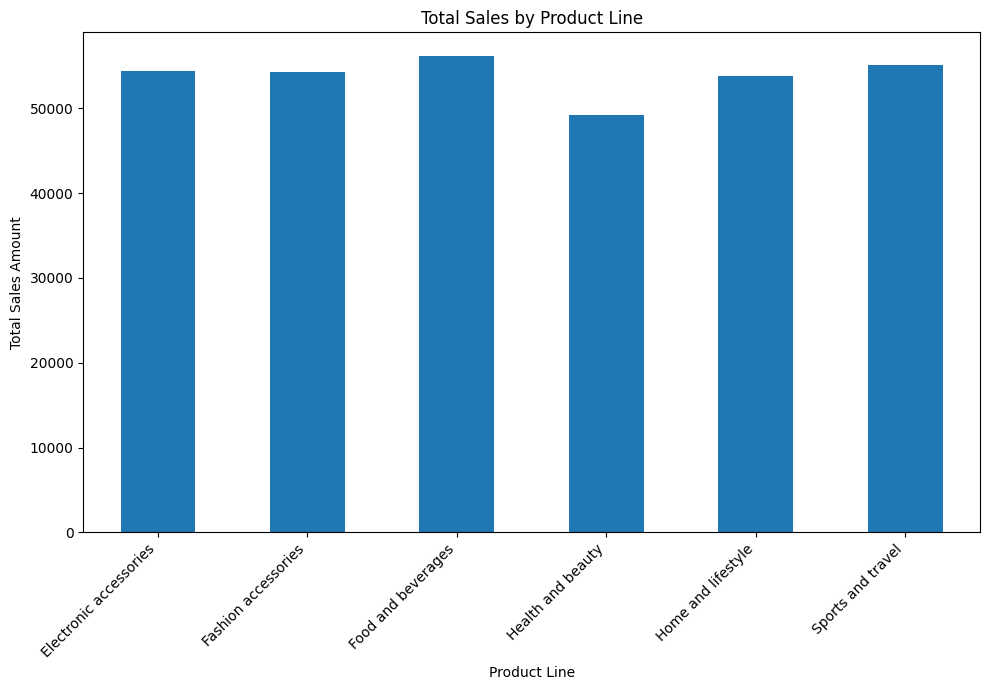

In [19]:
plt.figure(figsize=(10, 7))
product_line_sales.plot(kind='bar')
plt.xlabel('Product Line')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the chart, the top-performing product category in terms of sales is Food and beverages.

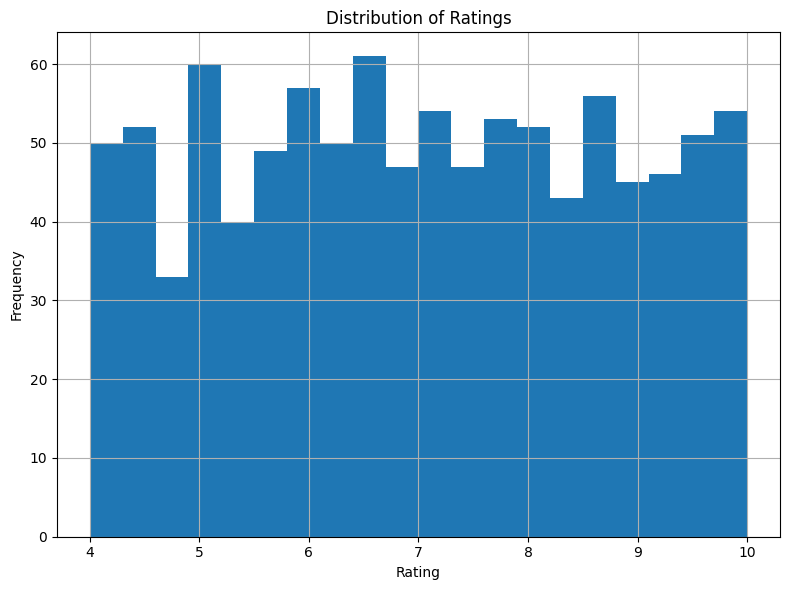

In [20]:
plt.figure(figsize=(8, 6))
df['Rating'].hist(bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.tight_layout()
plt.show()

Looking at the distribution of ratings histogram, the ratings appear to be relatively varied. While there's a peak around the 7-8 range, there is a noticeable spread across the entire rating scale, indicating that customers gave a variety of ratings rather than consistently high or low ones.

In [21]:
average_rating_by_branch = df.groupby('Branch')['Rating'].mean()
print(average_rating_by_branch)

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64


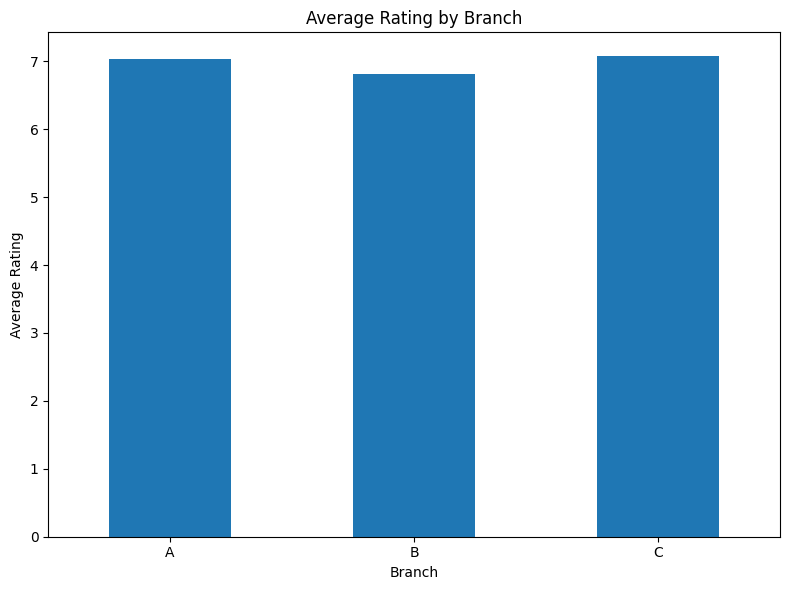

In [22]:
plt.figure(figsize=(8, 6))
average_rating_by_branch.plot(kind='bar')
plt.xlabel('Branch')
plt.ylabel('Average Rating')
plt.title('Average Rating by Branch')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Based on the sales data, Branch C demonstrated the highest total sales, making it the top-performing branch in terms of revenue. When comparing customer types, Member customers showed a slightly higher average purchase total compared to Normal customers. The Food and beverages product line emerged as the best-selling category. The distribution of customer ratings was varied, with a noticeable spread across the rating scale, although there was a peak around the 7-8 range.